<a href="https://colab.research.google.com/github/Jee-9/NLP/blob/main/Byte_pair_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background Theory
### - OOV Problem
- Out of Vocabulary </br>
: 아무리 많은 단어를 학습시켜도 모든 단어를 학습시킬 수는 없음</br>
Out of Vocabulary 또는 UNK(Unknown Token)을 처리해 줘야 한다. </br>

### - Subword Seperation
- 하나의 단어는 더 작은 단위의 이미있는 서브워드로 이루어져 있음 </br>
ex) birthplace = birty + place </br>
- 가장 대표적인 알고리즘이 BPE이고, 이를 실무에서 사용할 수 있도록 구현한 것이 Sentencepiece

# Byte Pair Encoding

- 기존의 접근
훈련 데이터로부터 각 단어의 빈도수 카운트 </br>
ex) low:5, lower:2, newest:3, widest:3

- BPE 알고리즘을 사용한 경우의 접근

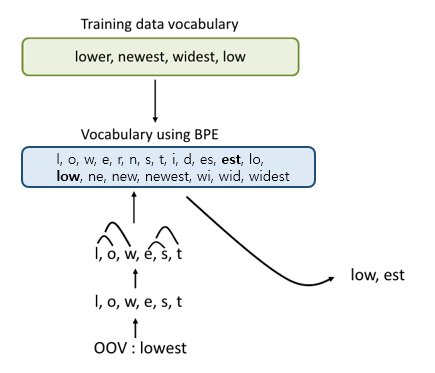

2개씩 쌍을 지어서 계속 이어나가는 방식

low:5, low er:2, newest:6, widest:3

## IPython download 및 필요한 라이브러리 임포트

In [ ]:
!pip install IPython

In [ ]:
import re, collections
from IPython.display import display, Markdown, Latex

## dict 지정

In [ ]:
# BPE를 몇회 수행할 것인가?
num_merges = 15

dictionary = {'l o w </w>': 5,
              'l o w e r </w': 2,
              'n e w e s t </w>' : 6,
              'w i d e s t </w>' : 3}

## CODE

In [ ]:
def get_count(dictionary):
  pairs = collections.defaultdict(int)
  # print(pairs)
  for word, freq in dictionary.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      pairs[symbols[i], symbols[i+1]] += freq
  print("현재 pair들의 빈도수 :", dict(pairs))
  return pairs


def merge_dict(pair, v_in):
  v_out = {}

  # 이스케이프 처리
  bigram = re.escape(' '.join(pair))
  print(bigram)

  '''
  bigram?
  문자, 음절 또는 단어 인 토큰 문자열에서 인접한 두 요소의 시퀀스
  '''

  p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
  for word in v_in:
    w_out = p.sub(''.join(pair), word)
    v_out[w_out] = v_in[word]
  
  return v_out

bpe_codes = {}
bpe_codes_reverse = {}

for i in range(num_merges):
  display(Markdown("### Iteration {}".format(i+1)))
  pairs = get_count(dictionary)
  best = max(pairs, key = pairs.get)
  dictionary = merge_dict(best, dictionary)

  bpe_codes[best] = i
  bpe_codes_reverse[best[0] + best[1]] = best

  print("new merge: {}".format(best))
  print("dictionary: {}".format(dictionary))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
e\ s
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
es\ t
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
est\ </w>
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
l\ o
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
lo\ w
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
n\ e
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
ne\ w
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w': 2, 'new est</w>': 6, 'w i d est</w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new\ est</w>
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
low\ </w>
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
w\ i
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w': 2, 'newest</w>': 6, 'wi d est</w>': 3}


### Iteration 11

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('wi', 'd'): 3, ('d', 'est</w>'): 3}
wi\ d
new merge: ('wi', 'd')
dictionary: {'low</w>': 5, 'low e r </w': 2, 'newest</w>': 6, 'wid est</w>': 3}


### Iteration 12

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2, ('wid', 'est</w>'): 3}
wid\ est</w>
new merge: ('wid', 'est</w>')
dictionary: {'low</w>': 5, 'low e r </w': 2, 'newest</w>': 6, 'widest</w>': 3}


### Iteration 13

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w'): 2}
low\ e
new merge: ('low', 'e')
dictionary: {'low</w>': 5, 'lowe r </w': 2, 'newest</w>': 6, 'widest</w>': 3}


### Iteration 14

현재 pair들의 빈도수 : {('lowe', 'r'): 2, ('r', '</w'): 2}
lowe\ r
new merge: ('lowe', 'r')
dictionary: {'low</w>': 5, 'lower </w': 2, 'newest</w>': 6, 'widest</w>': 3}


### Iteration 15

현재 pair들의 빈도수 : {('lower', '</w'): 2}
lower\ </w
new merge: ('lower', '</w')
dictionary: {'low</w>': 5, 'lower</w': 2, 'newest</w>': 6, 'widest</w>': 3}


**이스케이프 처리?**
- re.escape(str) </br>
re.escape함수는 문자열을 입력받으면 특수문자들을 이스케이프 처리시켜준다.

- 이스케이프 처리?</br>
쿼리 구문에서 특수 문자가 다르게 작용하기 때문에 이를 이스케이프 처리시켜주어서 특수 문자가 의미를 갖지 않게 만드는 작업


- reference: https://www.ibm.com/docs/ko/db2/11.1?topic=characters-escaping-special
- reference: https://greeksharifa.github.io/%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D(re)/2018/08/24/regex-usage-09-other-functions/

In [ ]:
get_count(dictionary)

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}


defaultdict(int,
            {('d', 'e'): 3,
             ('e', 'r'): 2,
             ('e', 's'): 9,
             ('e', 'w'): 6,
             ('i', 'd'): 3,
             ('l', 'o'): 7,
             ('n', 'e'): 6,
             ('o', 'w'): 7,
             ('r', '</w'): 2,
             ('s', 't'): 9,
             ('t', '</w>'): 9,
             ('w', '</w>'): 5,
             ('w', 'e'): 8,
             ('w', 'i'): 3})

In [ ]:
# merge 했던 기록들 보기
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9, ('wi', 'd'): 10, ('wid', 'est</w>'): 11, ('low', 'e'): 12, ('lowe', 'r'): 13, ('lower', '</w'): 14}


# OOV에 대처하기

In [ ]:
def get_pairs(word):
  '''
  Return set of symbol pairs in a word.
  Word is represented as a tuple of symbols.
  '''
  pairs = set()
  prev_char = word[0]
  for char in word[1:]:
    pairs.add((prev_char, char))
    prev_char = char
  return pairs

def encode(orig):
  '''Encode word based on list of BPE merge operations, which are applied consecutively'''
  word = tuple(orig) + ('</w>',)
  display(Markdown("__word split into characters:__<tt>{}</tt>".format(word)))

  pairs = get_pairs(word)

  if not pairs:
    return orig

  iteration = 0
  while True:
    iteration += 1
    display(Markdown("__Iteration {}:__".format(iteration)))

    print("bigrams in the word: {}".format(pairs))
    bigram = min(pairs, key =  lambda pair: bpe_codes.get(pair, float('inf')))
    print("candidate for merging: {}".format(bigram))
    if bigram not in bpe_codes:
      display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
      break
    
    fir, sec = bigram
    new_word = []
    i = 0

    while i < len(word):
      try:
        j = word.index(fir, i)
        new_word.extend(word[i:j])
        i = j
      except:
        new_word.extend(word[i:])
        break
      if word[i] == fir and i < len(word)-1 and word[i+1] == sec:
        new_word.append(fir+sec)
        i += 2
      else:
        new_word.append(word[i])
        i += 1
    new_word = tuple(new_word)
    word = new_word
    print("word after merging: {}".format(word))

    if len(word) == 1:
      break
    else:
      pairs = get_pairs(word)

  if word[-1] == '</w>':
    word = word[:-1]
  elif word[-1].endswith('</w>'):
    word = word[:-1] + (word[-1].replace('</w>', ''),)

  return word

In [ ]:
encode("loki")

__word split into characters:__<tt>('l', 'o', 'k', 'i', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('k', 'i'), ('i', '</w>'), ('l', 'o'), ('o', 'k')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'k', 'i', '</w>')


__Iteration 2:__

bigrams in the word: {('k', 'i'), ('i', '</w>'), ('lo', 'k')}
candidate for merging: ('k', 'i')


__Candidate not in BPE merges, algorithm stops.__

('lo', 'k', 'i')

In [ ]:
encode("lowest")

__word split into characters:__<tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('w', 'e'), ('s', 't'), ('e', 's'), ('t', '</w>'), ('o', 'w'), ('l', 'o')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't', '</w>')


__Iteration 2:__

bigrams in the word: {('es', 't'), ('w', 'es'), ('t', '</w>'), ('o', 'w'), ('l', 'o')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est', '</w>')


__Iteration 3:__

bigrams in the word: {('w', 'est'), ('o', 'w'), ('l', 'o'), ('est', '</w>')}
candidate for merging: ('est', '</w>')
word after merging: ('l', 'o', 'w', 'est</w>')


__Iteration 4:__

bigrams in the word: {('o', 'w'), ('l', 'o'), ('w', 'est</w>')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est</w>')


__Iteration 5:__

bigrams in the word: {('lo', 'w'), ('w', 'est</w>')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est</w>')


__Iteration 6:__

bigrams in the word: {('low', 'est</w>')}
candidate for merging: ('low', 'est</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

- reference: https://wikidocs.net/22592